In [42]:
import numpy as np 
import matplotlib.pyplot as plt

def g(b: int, epsilon: float):
    return (1 - 3 * epsilon**2 * b )

3333.333333333333
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
[0.9997, 0.9994, 0.9988, 0.9976, 0.9952, 0.9904, 0.9808, 0.9616, 0.9232, 0.8464, 0.6928, 0.38559999999999994, -0.22880000000000011, -1.4576000000000002, -3.9152000000000005]


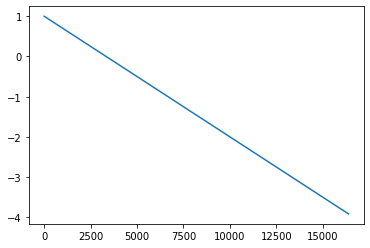

In [43]:
# Fix epsilon
epsilon = 1e-2
print(1/(3*epsilon ** 2))
b = [2**i for i in np.arange(15) ]
print(b)
k = [g(b=b_i, epsilon=epsilon) for b_i in b]
print(k)
plt.plot(b, k)
plt.show()

In [19]:
1e-2**2 * 3 * 32

0.009600000000000001